In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 


%matplotlib inline
from scipy import stats
from statsmodels.graphics.api import qqplot

# Introduccion

Hemos estudiado series temporales que no exhibieron un crecimiento a largo plazo, es decir no tienen una media constante. Sin embargo, muchas series de tiempo económicas y financieras no tienen una media constante. Los ejemplos incluyen: el PIB y el IPC de Ecuador.

Los modelos ARIMA no estacionarios incluyen la "caminata aleatoria" y la "caminata aleatoria con deriva". Modelos univariados simples como estos han demostrado ser herramientas de pronóstico muy poderosas. 

# Diferenciacion

La diferenciacon de una serie es un concepto similar al de la derivada. Basicamente, la diferenciacion es el cambio de una serie de un periodo a otro $\Delta x_t= x_t-x_{t-1}$

Si una seria necesita ser diferenciada para convertirla en estacionaria, decimos que la series es integrada de orden 1, $I(1)$. Si una serie necesita ser diferenciada dos veces para ser estacionaria, decimos que es integrada de orden 2, $I(2)$

Si una serie temporal X crece, no es estacionaria. Si su primera diferencia es estacionaria, entonces decimos que está "integrada". La diferenciación no elimina todas las no estacionarias; solo elimina la no estacionariedad asociada con la integración.

Podemos construir fácilmente en el marco ARMA (p, q) que utilizamos para los procesos estacionarios para incluir variables I (d). Los dos se pueden combinar para hacer modelos ARIMA (p, d, q). Realmente, hay pocas novedades aquí con respecto a la estimación. Simplemente necesitamos averiguar si diferenciar una variable un pequeño número de veces hace que una variable sea estacionaria. Luego procedemos con la parte ARMA (p, q) del análisis.
A continuación, exploraremos cómo la diferenciación afecta tres procesos no estacionarios diferentes: una caminata aleatoria, una caminata aleatoria con deriva y un modelo de tendencia determinista. Veremos que la dificultad radica en determinar si la variable es estacionaria después de las diferencias "d". Las diferencias erróneas se suman a nuestros problemas, por lo que no es una solución automática y gratuita.

In [2]:
# Importar data
df1 = pd.read_csv(r'CTASTRIM110.csv',header=0, parse_dates=True,squeeze=True)
df1.index = pd.period_range('2000Q1', '2019Q4', freq='Q')

In [3]:
# Definir varibles
dpib = df1['pib'].diff(periods=1)
pib = df1['pib']

Text(0, 0.5, 'Miles de US dólares, 2007=100')

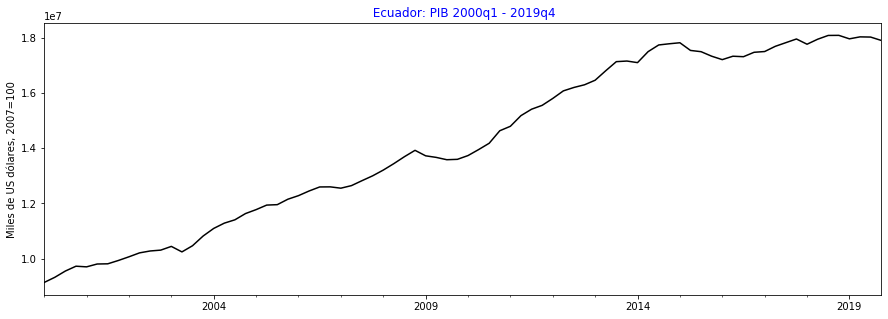

In [4]:
pib.plot(figsize=(15, 5),c='k')
plt.title(' Ecuador: PIB 2000q1 - 2019q4', c='b') 
plt.ylabel('Miles de US dólares, 2007=100') 


In [5]:
# Generar el modelo
model = sm.tsa.SARIMAX(pib, order=(1,1,0), trend='c')

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    pib   No. Observations:                   80
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1054.396
Date:                Tue, 23 Jun 2020   AIC                           2114.791
Time:                        13:31:01   BIC                           2121.899
Sample:                    03-31-2000   HQIC                          2117.639
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.843e+04   1.45e+04      4.711      0.000       4e+04    9.69e+04
ar.L1          0.0237      0.021      1.145      0.252      -0.017       0.064
sigma2      1.874e+10      0.011   1.65e+12      0.0